<a href="https://colab.research.google.com/github/nsiewick1/Superhero_SQLite/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [8]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('superhero_db.sqlite')

# Check if the connection was successful
print("Database created and connected")

# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

# DDL statements (using SQLite syntax)
ddl_statements = '''
DROP TABLE IF EXISTS heroes;
DROP TABLE IF EXISTS villains;
DROP TABLE IF EXISTS battles;


CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
);


CREATE TABLE IF NOT EXISTS villains(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villian_id INTEGER,
    outcome TEXT NOT NULL
);
'''

# Execute the DDL script
cursor.executescript(ddl_statements)
connection.commit()
print('Database schema created successfully.')


# Checking if tables were created successfully
print("heroes table created!")
print("villains table created!")
print("battles table created!")

Database created and connected
Cursor created!
Database schema created successfully.
heroes table created!
villains table created!
battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [9]:
# Delete all data from the heroes, villians, and battles tables
cursor.execute("DELETE FROM heroes")
cursor.execute("DELETE FROM villains")
cursor.execute("DELETE FROM battles")
connection.commit()

print("All data from the heroes, villains, and battles tables have been deleted.")

All data from the heroes, villains, and battles tables have been deleted.


In [10]:
import pandas as pd

# Load data from CSV into a DataFrame
df_heroes = pd.read_csv('heroes.csv')

# Display the first few rows of the DataFrame
print(df_heroes.head())

# Load data from CSV into a DataFrame
df_villains = pd.read_csv('villains.csv')

# Display the first few rows of the DataFrame
print(df_villains.head())

# Load data from CSV into a DataFrame
df_battles = pd.read_csv('battles.csv')

# Display the first few rows of the DataFrame
print(df_battles.head())

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


In [11]:
# Insert data from the DataFrame into the heroes table
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the heroes table.")

# Insert data from the DataFrame into the villians table
df_villains.to_sql('villains', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the villains table.")

# Insert data from the DataFrame into the battles table
df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the battles table.")

Data from CSV has been inserted into the heroes table.
Data from CSV has been inserted into the villains table.
Data from CSV has been inserted into the battles table.


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [12]:
# 1. Retrieve all superheroes and their powers.
print('Retrieve all superheros and their powers:')
cursor.execute('''
SELECT heroes.name, heroes.power FROM heroes
''' )
for row in cursor.fetchall():
    print(row)

# 2. Find all battles where the hero won.
print('Find all battles where the hero won:')
cursor.execute('''SELECT heroes.name, battles.id
FROM battles JOIN heroes
ON battles.hero_id = heroes.id
WHERE outcome = 'Hero Wins'
''')
for row in cursor.fetchall():
    print(row)

# 3. List all villains and their evil plans.
print('List all villains and their evil plans:')
cursor.execute('''
SELECT villains.name, villains.evil_plan
FROM villains
''' )
for row in cursor.fetchall():
    print(row)

# 4. Determine which superhero has fought the most battles.
print('Superhero that fought the most battles:')
cursor.execute('''
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
LIMIT 1;
''')

for row in cursor.fetchall():
    print(row)

Retrieve all superheros and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')
Find all battles where the hero won:
('Hulk', 2)
('Spider-Man', 5)
('Hulk', 7)
('Batman', 8)
('Black Panther', 9)
('The Flash', 13)
('Batman', 20)
('Batman', 29)
('Thor', 30)
List all villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')
Superhero that fought the most battles:
('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [13]:
# Create the sidekicks table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    superhero_sidekick TEXT NOT NULL,
    power TEXT NOT NULL
)
''')

print ("sidekicks table created")

# Delete all data from the sidekicks table before proceeding
cursor.execute("DELETE FROM sidekicks")

# Sample data to insert inot the sidekicks table
sidekicks_data = [('Chicken', 'Spider-Man', "Swimming"), ('Beef', 'Iron Man', "Running"),
 ('Ham', 'Batman', "Cooking"), ('Pork', 'Superman', "Sprinting"), ('Turkey', 'Thor', "Sprinting"),
                  ('Peanut', 'Wonder Woman', "Swimming"), ('Almond', 'Black Panther', "Swimming"),
                  ('Hazelnut', 'The Flash', "Running"), ('Coffee', 'Hulk', "Cooking"),
                   ('Rice', 'Doctor Strange', "Cooking")]

# Insert data into the table
cursor.executemany('''
INSERT INTO sidekicks (name, superhero_sidekick, power) VALUES (?, ?, ?)
''', sidekicks_data)

# Commit the transaction
connection.commit()

print("Data inserted into the sidekicks table successfully!")

# Query to find all the sidekicks who have a power of cooking
cursor.execute('''
SELECT * FROM sidekicks
WHERE power = 'Cooking'
''')

sidekicks_power = cursor.fetchall()

# Display the results
print("Sidekicks who have a power of cooking:")
for sidekick in sidekicks_power:
    print(f"Name: {sidekick[1]}, Power: {sidekick[3]}")


sidekicks table created
Data inserted into the sidekicks table successfully!
Sidekicks who have a power of cooking:
Name: Ham, Power: Cooking
Name: Coffee, Power: Cooking
Name: Rice, Power: Cooking


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

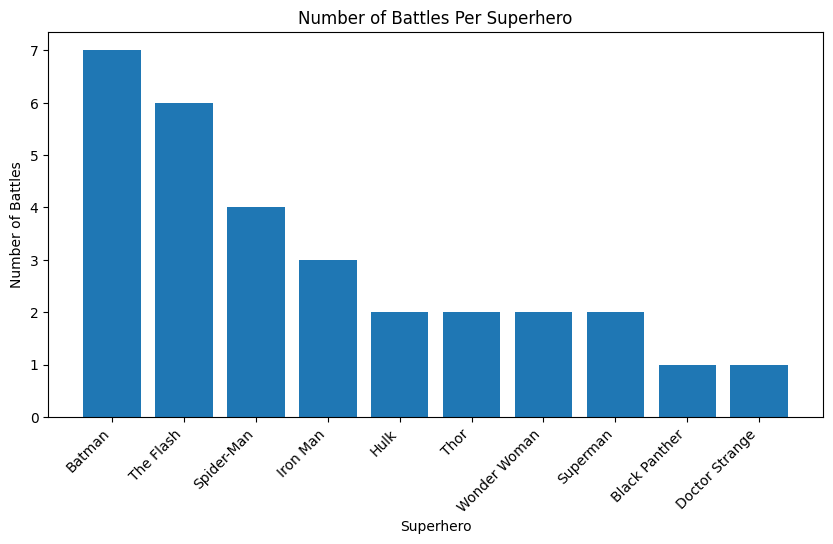

In [14]:
import matplotlib.pyplot as plt

# Merge battles data with hero names
battles_heroes = df_battles.merge(df_heroes, left_on = "hero_id", right_on = "id")

# Count battles per hero
hero_battle_counts = battles_heroes["name"].value_counts()

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(hero_battle_counts.index, hero_battle_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Superhero")
plt.ylabel("Number of Battles")
plt.title("Number of Battles Per Superhero")
plt.show()







## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!